In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio


In [2]:
data = sio.loadmat('mnist.mat')
X, y = data['trainX'][:10000,:], data['trainY'][0,:][:10000]
Xt, yt = data['testX'], data['testY'][0,:]


In [17]:
nclass = 10
m,n = X.shape


def get_obj(Theta, X, y):
    term = np.dot(X,Theta)
    logsumexp = np.log(np.sum(np.exp(term),axis=1))
    
    
    loss = -np.sum(logsumexp)
    for k in xrange(nclass):
        idx = np.equal(y,k)
        loss += np.sum(term[idx,k]) 
    return -loss / (m+0.)

def get_grad(Theta, X, y):
    term = np.dot(X,Theta)
    sumexp = np.sum(np.exp(term),axis=1)
    
    
    grad = -np.dot(X.T,(np.exp(term).T/sumexp).T)
    
    for k in xrange(nclass):
        idx = np.equal(y,k)
        grad[:,k] = grad[:,k] + np.sum( X[idx,:],axis=0)
    
    return -grad / (m+0.)
def get_pred_label(X,Theta):
    return np.argmax(np.dot(X,Theta),axis=1)

def get_misclass(y,yhat):
    return np.sum(np.not_equal(y,yhat))/(len(y)+0.)

Theta = np.zeros((n,nclass))
print get_misclass(y,get_pred_label(X,Theta)) , get_misclass(yt,get_pred_label(Xt,Theta))
print get_obj(Theta,X,y)
obj_old = get_obj(Theta,X,y)

L = (2.*np.sum(np.power(X,2.)[:])/(m+0.))

stepsize = 2./L
stepsize = 1.e-5
train_loss, test_loss, train_misclass, test_misclass = [],[],[],[]
for iter in xrange(1000):
    if iter % 10 == 0: print iter,
    g = get_grad(Theta,X,y)
    Theta = Theta - g*stepsize
    
    train_loss.append(get_obj(Theta,X,y))
    test_loss.append(get_obj(Theta,Xt,yt))
    train_misclass.append(get_misclass(y,get_pred_label(X,Theta)))
    test_misclass.append(get_misclass(yt,get_pred_label(Xt,Theta)))

train_loss = np.array(train_loss)
test_loss = np.array(test_loss)
train_misclass = np.array(train_misclass)
test_misclass = np.array(test_misclass)




0.8999 0.902
2.3025850929940463
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990


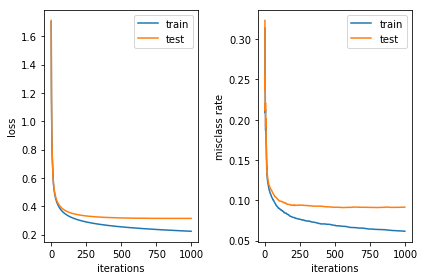

In [19]:


plt.subplot(1,2,1)
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend(['train','test'])


plt.subplot(1,2,2)
plt.plot(train_misclass)
plt.plot(test_misclass)
plt.xlabel('iterations')
plt.ylabel('misclass rate')
plt.legend(['train','test'])

plt.tight_layout()
plt.savefig('figs_soln/multiclass_logreg.eps')